# Mertens Conjecture

The Mertens conjecture is a striking example of a conjecture proven false despite lots of computationnal evidence in its favor. The goal of this notebook is to present the conjecture and its visual representation.


## Möbius function
The Möbius function is defined for all positive integer and has its value in $\{-1, 0, 1\}$ depending on the factorization of the integer into prime factors. We denote $\mu$ the Möbius function. We have :

* $\mu(n) = -1$ if $n$ is a square-free positive integer with an odd number of prime factors
* $\mu(n) = 0$ if $n$ has a squared prime factor
* $\mu(n) = 1$ if $n$ is a square-free positive integer with an even number of prime factors

Therefore we understand that for :
* $7 = 7$ we have $\mu(7) = -1$
* $12 = 2^2 \times 3$ we have $\mu(12) = 0$
* $10 = 2 \times 5$ we have $\mu(10) = 1$


## Mertens function
Since $\mu(n)$ tells if $n$ has an even number of prime factors with value 1 and odd number of prime factors with value -1, if we want to know which happens more often, we can sum it up to a certain integer.

We define the Mertens function as : $$\forall n\in \mathbb{N}^*, M(n) = \sum_{i=1}^n \mu(i)$$

Since $|\mu(n)| \leqslant 1$ for all $n\in\mathbb{N}^*$, we have that $|M(n)| \leqslant n$. Yet, the Mertens conjecture (1817) states that :
$$ \forall n \in \mathbb{N}^*, |M(n)| \leqslant \sqrt{n}$$

This conjecture have been disproved by Andrew Odlyzko and Herman te Riele (1985) but we can't print the number which fails the conjecture : we only know that the order of magnitude of such a number is $10^{10^{40}}$. For comparison, there is $10^{22}$ stars in the universe and $10^{80}$ atoms in the universe. So, even if we know the exact number for which the conjecture fails, we wouldn't be able to write it down.



## Visualization

Our goal is to be able to see the Mertens function curves. So first we define the Möbius function with the help of the *Primes* library of Julia. Then we will only display the curve for the $10^4$ first integer.

In [1]:
using Primes

In [2]:
function moebius(n::Integer)
    @assert n > 0
    decision(prime, exponent) = prime == 0 ? 0 : exponent == 1 ? -1 : 0
    reduce(*, decision(prime, exponent) for (prime, exponent) in factor(n) if prime ≥ 0; init=1)
end

μ(n) = moebius(n) 

μ (generic function with 1 method)

In [3]:
ENV["GKS_ENCODING"] = "utf8"
using Plots

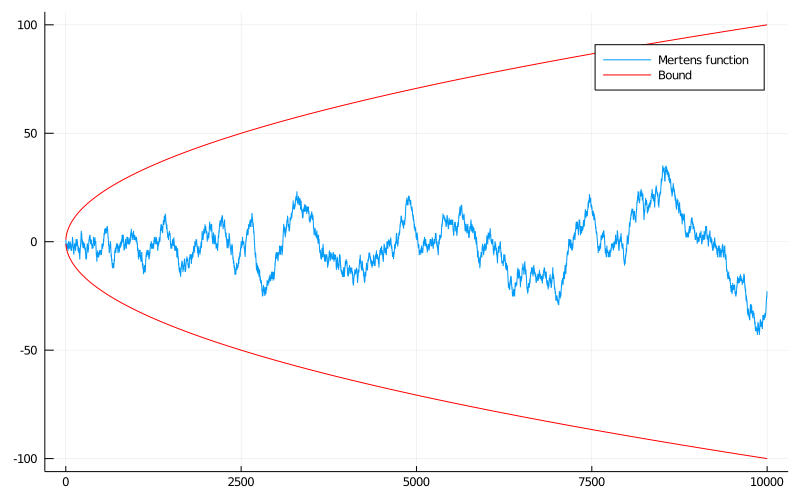

In [4]:
n_max = 10000

vector = [μ(n) for n in 1:n_max]
plot(1:n_max, cumsum(vector), label="Mertens function", size=(800, 500))
plot!(1:n_max, sqrt.(1:n_max), label="Bound", color="red")
plot!(1:n_max, -sqrt.(1:n_max), label="", color="red")